# pivpy example

In [1]:
import os, sys
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
sys.path.append('../../')

In [3]:
from pivpy import io, graphics

In [4]:
filename = '../data/Run000001.T000.D000.P000.H001.L.vec'

variables, units, rows, cols = io.parse_header(filename)
data = io.loadvec(filename,rows,cols)

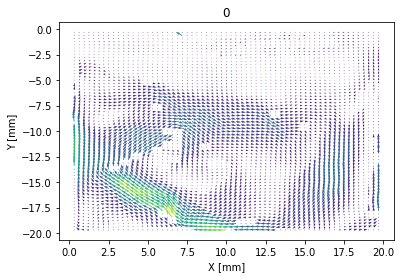

In [5]:
graphics.showf(data,var=variables,units=units)

In [6]:
d = np.loadtxt(filename,skiprows=1,delimiter=',',usecols=(0,1,2,3,4)).reshape(rows,cols,5)

In [7]:
u = xr.DataArray(d[:,:,2],dims=('x','y'),coords={'x':d[:,:,0][0,:],'y':d[:,:,1][:,0]})
v = xr.DataArray(d[:,:,3],dims=('x','y'),coords={'x':d[:,:,0][0,:],'y':d[:,:,1][:,0]})
cnc = xr.DataArray(d[:,:,4],dims=('x','y'),coords={'x':d[:,:,0][0,:],'y':d[:,:,1][:,0]})
data = xr.Dataset({'u': u, 'v': v,'cnc':cnc})           

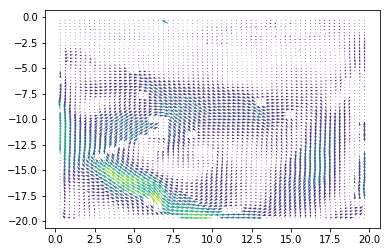

In [8]:
plt.figure()
plt.quiver(data.x,data.y,data.u,data.v,data.u**2 + data.v**2)

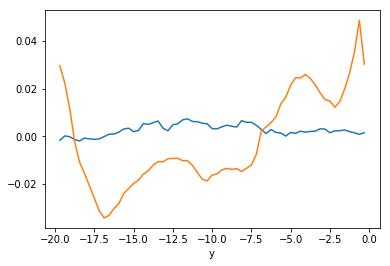

In [9]:
# profile along y
data.mean(dim='x').to_dataframe()['u'].plot()
data.mean(dim='x').to_dataframe()['v'].plot()

In [24]:
def filterf(data):
    """Gaussian filtering of velocity """
    from scipy.ndimage.filters import gaussian_filter as gf
    data['u'] = xr.DataArray(gf(data['u'],1),dims=('x','y'))
    data['v'] = xr.DataArray(gf(data['v'],1),dims=('x','y'))
    return data

In [25]:
data = filterf(data)

In [33]:
data

<xarray.Dataset>
Dimensions:  (x: 63, y: 63)
Coordinates:
  * x        (x) float64 0.3125 0.625 0.9374 1.25 1.562 1.875 2.187 2.5 ...
  * y        (y) float64 -0.3125 -0.625 -0.9374 -1.25 -1.562 -1.875 -2.187 ...
Data variables:
    u        (x, y) float64 0.001019 0.001055 0.001135 0.001259 0.001405 ...
    v        (x, y) float64 0.0001938 0.0002068 0.0002158 0.0002016 ...
    cnc      (x, y) float64 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 ...

In [35]:
data = xr.concat([data, data], 't')

In [43]:
data.sel??

Signature: data.sel(indexers=None, method=None, tolerance=None, drop=False, **indexers_kwargs)
Source:   
    def sel(self, indexers=None, method=None, tolerance=None, drop=False,
            **indexers_kwargs):
        """Returns a new dataset with each array indexed by tick labels
        along the specified dimension(s).

        In contrast to `Dataset.isel`, indexers for this method should use
        labels instead of integers.

        Under the hood, this method is powered by using pandas's powerful Index
        objects. This makes label based indexing essentially just as fast as
        using integer indexing.

        It also means this method uses pandas's (well documented) logic for
        indexing. This means you can use string shortcuts for datetime indexes
        (e.g., '2000-01' to select all values in January 2000). It also means
        that slices are treated as inclusive of both the start and stop values,
        unlike normal Python indexing.

        Parameters

In [48]:
data.mean(dim='t')

<xarray.Dataset>
Dimensions:  (x: 63, y: 63)
Coordinates:
  * x        (x) float64 0.3125 0.625 0.9374 1.25 1.562 1.875 2.187 2.5 ...
  * y        (y) float64 -0.3125 -0.625 -0.9374 -1.25 -1.562 -1.875 -2.187 ...
Data variables:
    u        (x, y) float64 0.001019 0.001055 0.001135 0.001259 0.001405 ...
    v        (x, y) float64 0.0001938 0.0002068 0.0002158 0.0002016 ...
    cnc      (x, y) float64 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 ...

In [90]:
tmp = np.gradient(data['u'],axis=(1,2))

In [97]:
tmp[0].shape

(2, 63, 63)